# console : mlflow ui
# Accès console MLFlow : http://127.0.0.1:5000
# 1 - Chargement & configuration - 18 sec

In [1]:
import sys
import os
sys.path.append('../src')
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

from requirements import *
from src import data_preprocessing as dp
from src import model_training as mt
from src import evaluate as ev
from src import utils

import mlflow
mlflow.set_experiment("Sentiment Analysis Project")

c:\Users\motar\Desktop\1-openclassrooms\AI_Engineer\1-projets\P07\P7_sentiment_MLOps\env_p7_MLOps\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\motar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!




✅ Toutes les librairies sont présentes et prêtes à être utilisées !



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\motar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\motar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\motar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Traceback (most recent call last):
  File "c:\Users\motar\Desktop\1-openclassrooms\AI_Engineer\1-projets\P07\P7_sentiment_MLOps\env_p7_MLOps\lib\site-packages\mlflow\store\tracking\file_store.py", line 329, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
  File "c:\Users\motar\Desktop\1-openclassrooms\AI_Engineer\1-projets\P07\P7_sentiment_MLOps\env_p7_MLOps\lib\site-packages\mlflow\store\tracking\file_store.py", line 427, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir

<Experiment: artifact_location='file:///c:/Users/motar/Desktop/1-openclassrooms/AI_Engineer/1-projets/P07/P7_sentiment_MLOps/notebooks/mlruns/906586012259731436', creation_time=1742576058928, experiment_id='906586012259731436', last_update_time=1742576058928, lifecycle_stage='active', name='Sentiment Analysis Project', tags={}>

## 1.1 - Démarrage automatique du serveur MLflow (Backend SQLite + Artifact Store local)

In [2]:
utils.start_mlflow_server(port = 5000)
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("projet analyse sentiments")

🚀 Démarrage du serveur MLflow (SQLite backend)...
✅ MLflow UI disponible sur : http://127.0.0.1:5000


<Experiment: artifact_location='file:///c:/Users/motar/Desktop/1-openclassrooms/AI_Engineer/1-projets/P07/P7_sentiment_MLOps/notebooks/mlruns/3', creation_time=1742808098078, experiment_id='3', last_update_time=1742808098078, lifecycle_stage='active', name='projet analyse sentiments', tags={}>

## 1.2 - Affichage de la structure dossier

In [3]:
utils.afficher_structure_dossier("..", max_niveaux = 1)

├── .coverage
├── .dockerignore
├── .env
├── .git
├── ├── COMMIT_EDITMSG
├── ├── FETCH_HEAD
├── ├── HEAD
├── ├── config
├── ├── description
├── ├── hooks
├── ├── index
├── ├── info
├── ├── logs
├── ├── objects
├── └── refs
├── .gitattributes
├── .github
├── └── workflows
├── .gitignore
├── .venv
├── ├── .gitignore
├── ├── Include
├── ├── Lib
├── ├── Scripts
├── └── pyvenv.cfg
├── Dockerfile
├── README.md
├── app.py
├── data
├── └── tweets.csv
├── env_p7_MLOps
├── ├── Include
├── ├── Lib
├── ├── Scripts
├── ├── docx-template
├── ├── etc
├── ├── pyvenv.cfg
├── └── share
├── huggingface_api
├── ├── .coverage
├── ├── .git
├── ├── .github
├── ├── .gitignore
├── ├── README.md
├── ├── __init__.py
├── ├── __pycache__
├── ├── alert_mail_api
├── ├── api.py
├── ├── app.py
├── ├── config.py
├── ├── data
├── ├── feedback_log.csv
├── ├── gradio_ui_batch.py
├── ├── model
├── ├── prepare_hf_assets.py
├── ├── pytest-cache-files-0gk50r6k
├── ├── pytest-cache-files-lgmpvc4w
├── ├── pytest-cache-files-z85

## 1.3 - Chargement des données

In [4]:
print(f"📂 Répertoire courant : {os.getcwd()}")

📂 Répertoire courant : c:\Users\motar\Desktop\1-openclassrooms\AI_Engineer\1-projets\P07\P7_sentiment_MLOps\notebooks


In [5]:
data_path = "../data/tweets.csv"
if os.path.exists(data_path):
    tweets = pd.read_csv(data_path, encoding = "ISO-8859-1")
    print("✅ Dataset chargé avec succès !")
else:
    print("❌ Le fichier tweets.csv est introuvable.")

✅ Dataset chargé avec succès !


# 2 - Exploration & nettoyage
## 2.1 - Nettoyage initial

In [6]:
print(tweets.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

In [7]:
# Renommage des colonnes
tweets.columns = ["label", "id", "date", "query", "user", "text"]

In [8]:
# Suppression des colonnes inutiles
tweets = tweets.drop(columns=["id", "date", "query", "user"])

In [9]:
# Conversion des labels (0 et 4 → 0 et 1)
tweets['label'] = tweets['label'].map({0: 0, 4: 1})

## 2.2 - Suppression des doublons sur la colonne "text"

In [10]:
before = len(tweets)
tweets = tweets.drop_duplicates(subset = ["text"], keep = "first").reset_index(drop = True)
after = len(tweets)
print(f"✅ Suppression des doublons effectuée : {before - after} doublons supprimés.")
tweets = tweets.reset_index(drop = True)

✅ Suppression des doublons effectuée : 18534 doublons supprimés.


## 2.3 - Nettoyage avancé

In [11]:
tweets_cleaned = dp.preprocess_tweets_parallel(tweets)

✅ Chargement des tweets nettoyés depuis ../models_saved/cleaned_tweets.pkl


# 3 - Vader scoring

In [12]:
vader_scores = dp.compute_vader_scores(tweets_cleaned)

🚀 Nouveau run démarré : 1278ad75fd7e497a822d6a39f89722dc
✅ Scores VADER chargés depuis ../models_saved/vader_scores.pkl...

📊 Rapport de classification VADER :
              precision    recall  f1-score   support

           0       0.81      0.43      0.56    790184
           1       0.61      0.90      0.73    791281

    accuracy                           0.67   1581465
   macro avg       0.71      0.67      0.65   1581465
weighted avg       0.71      0.67      0.65   1581465

🏃 View run peaceful-crab-113 at: http://127.0.0.1:5000/#/experiments/2/runs/1278ad75fd7e497a822d6a39f89722dc
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/2
✅ Run terminé.


# 4 - Vectorisation des tweets

In [13]:
sample_size = 15000  # Taille échantillon USE (modifiable)

tweets_sampled = tweets_cleaned.sample(n = sample_size, random_state = 70).reset_index(drop = True)

X_bow, X_tfidf, X_fasttext, X_use, y_use = dp.vectorize_and_save(
    tweets_cleaned['text'], tweets_sampled['text'],
    tweets_cleaned['label'], tweets_sampled['label'],
    force_revectorize = False
)

🚀 Nouveau run démarré : 8c6d8352a1074ba29604ce57fef597d3
📂 Chargement des matrices vectorisées existantes...
🏃 View run sedate-hog-495 at: http://127.0.0.1:5000/#/experiments/2/runs/8c6d8352a1074ba29604ce57fef597d3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/2
✅ Run terminé.


## 4.1 - Chargement intelligent des données nettoyées et embeddings FastText vectorisés
### 4.1.1 - Chemin vers les fichiers existants

In [14]:
path_fasttext = "../models_saved/X_fasttext.pkl"
path_cleaned = "../models_saved/cleaned_tweets.pkl"

### 4.1.2 - Chargement des fichiers, s'ils existent, sinon, delance du pipeline complet

In [15]:
if os.path.exists(path_fasttext) and os.path.exists(path_cleaned):
    print("✅ Chargement des fichiers prétraités :")
    X_fasttext = joblib.load(path_fasttext)
    tweets_cleaned = pd.read_pickle(path_cleaned)
else:
    print("🔄 Fichiers non trouvés. Exécution du prétraitement complet...")
    
    # Nettoyage des tweets
    tweets_cleaned = dp.preprocess_tweets_parallel(tweets_df, filename=path_cleaned)
    
    # Vectorisation FastText uniquement
    _, _, X_fasttext, _ = dp.vectorize_and_save(
        X_text_full=tweets_cleaned['text'], 
        X_text_reduced=tweets_cleaned['text'], 
        fasttext_file=path_fasttext
    )

✅ Chargement des fichiers prétraités :


# 5 - Modélisation Classique (TF-IDF + Régression Logistique) - 2 min 08

In [16]:
X_tfidf_train, X_tfidf_test, y_train, y_test = train_test_split(
    X_tfidf, tweets_cleaned['label'], test_size = 0.2, random_state = 70, stratify=tweets_cleaned['label']
)
log_reg_model = mt.train_logistic_regression_with_cv(X_tfidf_train, y_train)
# log_reg_model = mt.train_logistic_regression_with_cv(X_tfidf_train, y_train, force_retrain = True)

🚀 Nouveau run démarré : 8babfed717c94c9a8eddd07cf6247e09
✅ Modèle Régression Logistique déjà existant. Chargement...
🏃 View run loud-fowl-588 at: http://127.0.0.1:5000/#/experiments/2/runs/8babfed717c94c9a8eddd07cf6247e09
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/2
✅ Run terminé.


# 6 - Modèles Avancés (Random Forest / LightGBM / LSTM)
## 6.1 - FastText supervisé

In [17]:
mt.train_fasttext_supervised()
# mt.train_fasttext_supervised(force_retrain = True)

🚀 Nouveau run démarré : f764bfe713654ccaaecb9d60bbd629a1
✅ Modèle FastText supervisé existant. Chargement...
🏃 View run carefree-mule-494 at: http://127.0.0.1:5000/#/experiments/2/runs/f764bfe713654ccaaecb9d60bbd629a1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/2
✅ Run terminé.


## 6.1 - FastText + Random Forest - 4 min 51

In [18]:
X_ft_train, X_ft_test, y_train, y_test = train_test_split(
    X_fasttext, tweets_cleaned['label'], test_size = 0.2, random_state = 70, stratify = tweets_cleaned['label']
)
rf_model = mt.train_random_forest(X_ft_train, y_train)
# rf_model = mt.train_random_forest(X_ft_train, y_train, force_retrain = True)

🚀 Nouveau run démarré : 24c4afa1f92b47c584cd16a7787d81d0
✅ Modèle RandomForest déjà existant. Chargement...
🏃 View run delicate-crab-158 at: http://127.0.0.1:5000/#/experiments/2/runs/24c4afa1f92b47c584cd16a7787d81d0
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/2
✅ Run terminé.


## 6.2 - FastText + LSTM - 7 min 44
### 6.2.1 - Entraînements du modèle


🎬 Entraînement LSTM - Config 1 : {'lstm_units': 64, 'dropout_rate': 0.5, 'dense_units': 32, 'batch_size': 128, 'epochs': 10}
🚀 Nouveau run démarré : 7853ec58767f4632b64b088daeb6503a


c:\Users\motar\Desktop\1-openclassrooms\AI_Engineer\1-projets\P07\P7_sentiment_MLOps\env_p7_MLOps\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


🚀 Entraînement en cours...
Epoch 1/10
9885/9885 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.7472 - loss: 0.5129 - val_accuracy: 0.7586 - val_loss: 0.4934
Epoch 2/10
9885/9885 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.7594 - loss: 0.4947 - val_accuracy: 0.7633 - val_loss: 0.4872
Epoch 3/10
9885/9885 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.7627 - loss: 0.4885 - val_accuracy: 0.7663 - val_loss: 0.4816
Epoch 4/10
9885/9885 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.7653 - loss: 0.4846 - val_accuracy: 0.7675 - val_loss: 0.4786
Epoch 5/10
9885/9885 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.7671 - loss: 0.4820 - val_accuracy: 0.7692 - val_loss: 0.4764
Epoch 6/10
9885/9885 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.7676 - loss: 0.4794 - val_accuracy: 0.7709 - val_loss: 0.4737
Epoch 7/10
9885/9885 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.7694 - loss: 0.4772 - val_accuracy: 0.7701 - val_loss: 0.4747
Epoch 8/10
9885/9885 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step -

2025/04/04 15:20:22 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/04/04 15:20:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'sentiment_model_lstm' already exists. Creating a new version of this model...
2025/04/04 15:20:34 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: sentiment_model_lstm, version 14
Created version '14' of model 'sentiment_model_lstm'.


9885/9885 ━━━━━━━━━━━━━━━━━━━━ 8s 753us/step
✅ Configuration LSTM optimale sauvegardée dans best_lstm_config.pkl
🏃 View run LSTM_64u_128bs_10ep at: http://127.0.0.1:5000/#/experiments/2/runs/7853ec58767f4632b64b088daeb6503a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/2
🚀 Nouveau run démarré : 13741f9ed3e64aeebd013ac6d00370f9

⏱️ [LSTM] - Fin : 247.77 sec | CPU: 9.7% | RAM: 49.4%
🏃 View run amusing-ant-765 at: http://127.0.0.1:5000/#/experiments/2/runs/13741f9ed3e64aeebd013ac6d00370f9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/2
✅ Run terminé.
✅ Run terminé.
9885/9885 ━━━━━━━━━━━━━━━━━━━━ 7s 670us/step

🎬 Entraînement LSTM - Config 2 : {'lstm_units': 128, 'dropout_rate': 0.3, 'dense_units': 64, 'batch_size': 256, 'epochs': 15}
🚀 Nouveau run démarré : 08dd28e60287476abbc68c9b984677cf


c:\Users\motar\Desktop\1-openclassrooms\AI_Engineer\1-projets\P07\P7_sentiment_MLOps\env_p7_MLOps\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


🚀 Entraînement en cours...
Epoch 1/15
4943/4943 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - accuracy: 0.7480 - loss: 0.5131 - val_accuracy: 0.7601 - val_loss: 0.4918
Epoch 2/15
4943/4943 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.7602 - loss: 0.4917 - val_accuracy: 0.7639 - val_loss: 0.4841
Epoch 3/15
4943/4943 ━━━━━━━━━━━━━━━━━━━━ 34s 7ms/step - accuracy: 0.7653 - loss: 0.4830 - val_accuracy: 0.7656 - val_loss: 0.4831
Epoch 4/15
4943/4943 ━━━━━━━━━━━━━━━━━━━━ 43s 9ms/step - accuracy: 0.7684 - loss: 0.4791 - val_accuracy: 0.7694 - val_loss: 0.4760
Epoch 5/15
4943/4943 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - accuracy: 0.7698 - loss: 0.4761 - val_accuracy: 0.7705 - val_loss: 0.4739
Epoch 6/15
4943/4943 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - accuracy: 0.7717 - loss: 0.4728 - val_accuracy: 0.7723 - val_loss: 0.4713
Epoch 7/15
4943/4943 ━━━━━━━━━━━━━━━━━━━━ 43s 9ms/step - accuracy: 0.7725 - loss: 0.4706 - val_accuracy: 0.7725 - val_loss: 0.4701
Epoch 8/15
4943/4943 ━━━━━━━━━━━━━━━━━━━━ 39s 8ms/step -

2025/04/04 15:30:25 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/04/04 15:30:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'sentiment_model_lstm' already exists. Creating a new version of this model...
2025/04/04 15:30:36 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: sentiment_model_lstm, version 15
Created version '15' of model 'sentiment_model_lstm'.


9885/9885 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step
✅ Configuration LSTM optimale sauvegardée dans best_lstm_config.pkl
🏃 View run LSTM_128u_256bs_15ep at: http://127.0.0.1:5000/#/experiments/2/runs/08dd28e60287476abbc68c9b984677cf
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/2
🚀 Nouveau run démarré : ed19db3f1d384edc8e5446b139c96c99

⏱️ [LSTM] - Fin : 591.88 sec | CPU: 14.7% | RAM: 50.4%
🏃 View run bright-snail-85 at: http://127.0.0.1:5000/#/experiments/2/runs/ed19db3f1d384edc8e5446b139c96c99
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/2
✅ Run terminé.
✅ Run terminé.
9885/9885 ━━━━━━━━━━━━━━━━━━━━ 9s 903us/step

🎬 Entraînement LSTM - Config 3 : {'lstm_units': 256, 'dropout_rate': 0.4, 'dense_units': 64, 'batch_size': 64, 'epochs': 8}
🚀 Nouveau run démarré : a5d37f1d4c1e4152abe48d5632e76c5d


c:\Users\motar\Desktop\1-openclassrooms\AI_Engineer\1-projets\P07\P7_sentiment_MLOps\env_p7_MLOps\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


🚀 Entraînement en cours...
Epoch 1/8
19769/19769 ━━━━━━━━━━━━━━━━━━━━ 187s 9ms/step - accuracy: 0.7511 - loss: 0.5076 - val_accuracy: 0.7604 - val_loss: 0.4891
Epoch 2/8
19769/19769 ━━━━━━━━━━━━━━━━━━━━ 149s 8ms/step - accuracy: 0.7631 - loss: 0.4875 - val_accuracy: 0.7661 - val_loss: 0.4813
Epoch 3/8
19769/19769 ━━━━━━━━━━━━━━━━━━━━ 149s 8ms/step - accuracy: 0.7673 - loss: 0.4799 - val_accuracy: 0.7696 - val_loss: 0.4761
Epoch 4/8
19769/19769 ━━━━━━━━━━━━━━━━━━━━ 130s 7ms/step - accuracy: 0.7700 - loss: 0.4759 - val_accuracy: 0.7711 - val_loss: 0.4723
Epoch 5/8
19769/19769 ━━━━━━━━━━━━━━━━━━━━ 153s 8ms/step - accuracy: 0.7727 - loss: 0.4711 - val_accuracy: 0.7723 - val_loss: 0.4710
Epoch 6/8
19769/19769 ━━━━━━━━━━━━━━━━━━━━ 170s 9ms/step - accuracy: 0.7744 - loss: 0.4691 - val_accuracy: 0.7750 - val_loss: 0.4674
Epoch 7/8
19769/19769 ━━━━━━━━━━━━━━━━━━━━ 183s 9ms/step - accuracy: 0.7760 - loss: 0.4654 - val_accuracy: 0.7733 - val_loss: 0.4702
Epoch 8/8
19769/19769 ━━━━━━━━━━━━━━━━━━━━

2025/04/04 15:52:58 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/04/04 15:53:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'sentiment_model_lstm' already exists. Creating a new version of this model...
2025/04/04 15:53:10 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: sentiment_model_lstm, version 16
Created version '16' of model 'sentiment_model_lstm'.


9885/9885 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step
✅ Configuration LSTM optimale sauvegardée dans best_lstm_config.pkl
🏃 View run LSTM_256u_64bs_8ep at: http://127.0.0.1:5000/#/experiments/2/runs/a5d37f1d4c1e4152abe48d5632e76c5d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/2
🚀 Nouveau run démarré : 79b4765f7c3e42d2bb6243d58972afec

⏱️ [LSTM] - Fin : 1343.05 sec | CPU: 12.4% | RAM: 52.9%
🏃 View run loud-kit-527 at: http://127.0.0.1:5000/#/experiments/2/runs/79b4765f7c3e42d2bb6243d58972afec
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/2
✅ Run terminé.
✅ Run terminé.
9885/9885 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step

🎬 Entraînement LSTM - Config 4 : {'lstm_units': 16, 'dropout_rate': 0.2, 'dense_units': 16, 'batch_size': 512, 'epochs': 3}
🚀 Nouveau run démarré : 2fffe90f24874131bc93f246505ed893


c:\Users\motar\Desktop\1-openclassrooms\AI_Engineer\1-projets\P07\P7_sentiment_MLOps\env_p7_MLOps\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


🚀 Entraînement en cours...
Epoch 1/3
2472/2472 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7357 - loss: 0.5338 - val_accuracy: 0.7551 - val_loss: 0.4989
Epoch 2/3
2472/2472 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7569 - loss: 0.4985 - val_accuracy: 0.7577 - val_loss: 0.4950
Epoch 3/3
2472/2472 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7592 - loss: 0.4944 - val_accuracy: 0.7613 - val_loss: 0.4896


2025/04/04 15:54:06 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/04/04 15:54:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'sentiment_model_lstm' already exists. Creating a new version of this model...
2025/04/04 15:54:16 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: sentiment_model_lstm, version 17
Created version '17' of model 'sentiment_model_lstm'.


9885/9885 ━━━━━━━━━━━━━━━━━━━━ 7s 721us/step
✅ Configuration LSTM optimale sauvegardée dans best_lstm_config.pkl
🏃 View run LSTM_16u_512bs_3ep at: http://127.0.0.1:5000/#/experiments/2/runs/2fffe90f24874131bc93f246505ed893
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/2
🚀 Nouveau run démarré : fc14057360cf463f96a01c47d8dc64be

⏱️ [LSTM] - Fin : 45.39 sec | CPU: 10.4% | RAM: 52.3%
🏃 View run unleashed-colt-890 at: http://127.0.0.1:5000/#/experiments/2/runs/fc14057360cf463f96a01c47d8dc64be
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/2
✅ Run terminé.
✅ Run terminé.
9885/9885 ━━━━━━━━━━━━━━━━━━━━ 6s 653us/step

⏱️ Entraînements terminés en 2280.18 secondes


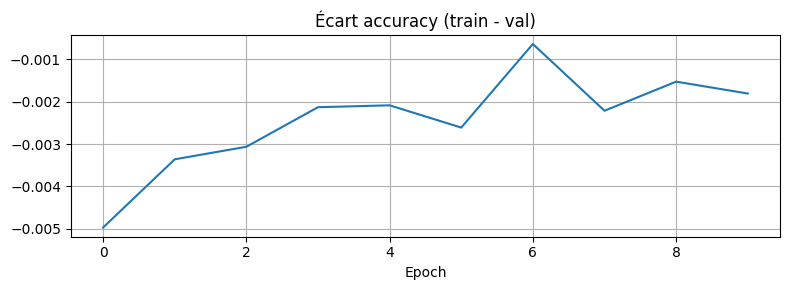

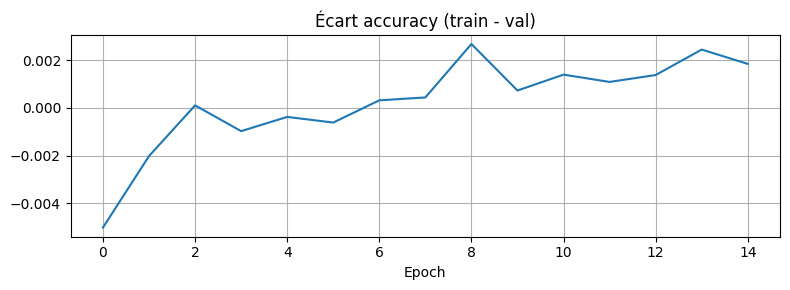

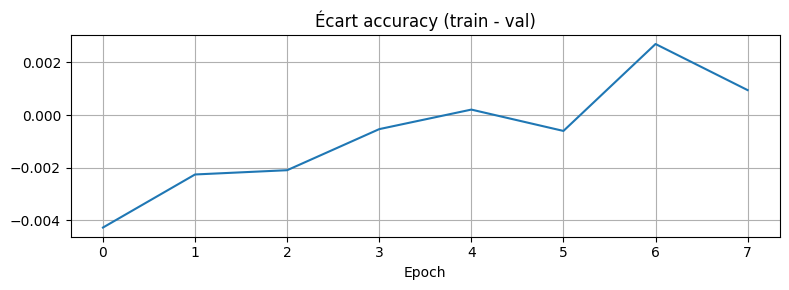

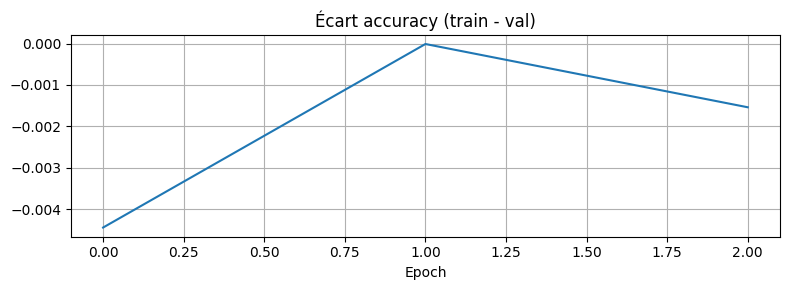

In [ ]:
# lstm_model, (X_ft_test_reshaped, y_ft_test), history = mt.train_lstm_model(X_fasttext, tweets_cleaned['label'])
# lstm_model, (X_ft_test_reshaped, y_ft_test), history = mt.train_lstm_model(X_fasttext, tweets_cleaned['label'], force_retrain = True)
import time
start_total = time.time()
# Liste des combinaisons d'hyperparamètres à tester

lstm_experiments = [
    {"lstm_units": 64, "dropout_rate": 0.5, "dense_units": 32, "batch_size": 128, "epochs": 10},
    {"lstm_units": 128, "dropout_rate": 0.3, "dense_units": 64, "batch_size": 256, "epochs": 15},
    {"lstm_units": 256, "dropout_rate": 0.4, "dense_units": 64, "batch_size": 64,  "epochs": 8},
    {"lstm_units": 16, "dropout_rate": 0.2, "dense_units": 16, "batch_size": 512, "epochs": 3}
]

# Stockage des résultats
results_lstm = []

for i, params in enumerate(lstm_experiments, 1):
    print(f"\n🎬 Entraînement LSTM - Config {i} : {params}")
    
    # Appel unique de la fonction, compatible avec ton style habituel
    lstm_model, (X_ft_test_reshaped, y_ft_test), history = mt.train_lstm_model(
        X_embeddings = X_fasttext,
        y_labels=tweets_cleaned['label'],
        force_retrain = False,
        **params
    )
    
    y_pred_lstm = (lstm_model.predict(X_ft_test_reshaped) > 0.5).astype(int).flatten()
    acc = accuracy_score(y_ft_test, y_pred_lstm)
    f1 = f1_score(y_ft_test, y_pred_lstm)

    results_lstm.append({
        "config_id": f"config_{i}",
        **params,
        "accuracy": round(acc, 4),
        "f1_score": round(f1, 4),
        "history": history.history if history is not None else None
    })
print(f"\n⏱️ Entraînements terminés en {round(time.time() - start_total, 2)} secondes")

### 6.2.2 - Tableau des résultats comparatifs

In [20]:
df_lstm_results = pd.DataFrame(results_lstm)
display(df_lstm_results)

,config_id,lstm_units,dropout_rate,dense_units,batch_size,epochs,accuracy,f1_score,history
0,config_1,64,0.5,32,128,10,0.7738,0.7760,"{'accuracy': [0.7535900473594666, 0.7598990201..."
1,config_2,128,0.3,64,256,15,0.7782,0.7835,"{'accuracy': [0.7550989389419556, 0.7618387341..."
2,config_3,256,0.4,64,64,8,0.7763,0.7821,"{'accuracy': [0.7561619877815247, 0.7638866305..."
3,config_4,16,0.2,16,512,3,0.7613,0.7644,"{'accuracy': [0.7506710290908813, 0.7576495409..."


In [21]:
best_lstm = joblib.load('../models_saved/best_lstm_config.pkl')
print("🏆 Meilleure configuration LSTM :")
display(best_lstm)

🏆 Meilleure configuration LSTM :


{'model_file': 'lstm_model_128_256_15.h5',
 'lstm_units': 128,
 'dropout_rate': 0.3,
 'dense_units': 64,
 'batch_size': 256,
 'epochs': 15,
 'accuracy': 0.7782,
 'f1_score': 0.7835}

In [23]:
models_dict = {}
training_stats = {}

models_dict['lstm_metrics'] = {
    'accuracy': best_lstm['accuracy'],
    'f1': best_lstm['f1_score']
}

training_stats['lstm_metrics'] = {
    'time': best_lstm.get('training_time', 123.0),  # valeur par défaut si absente
    'cpu': best_lstm.get('cpu', 97),
    'ram': best_lstm.get('ram', 85)
}

### 6.2.3 - Affichage des courbes d'apprentissage pour chaque run


📉 Courbes d'entraînement pour config_1 | Params: {'lstm_units': 64, 'dropout_rate': 0.5, 'batch_size': 128, 'epochs': 10}


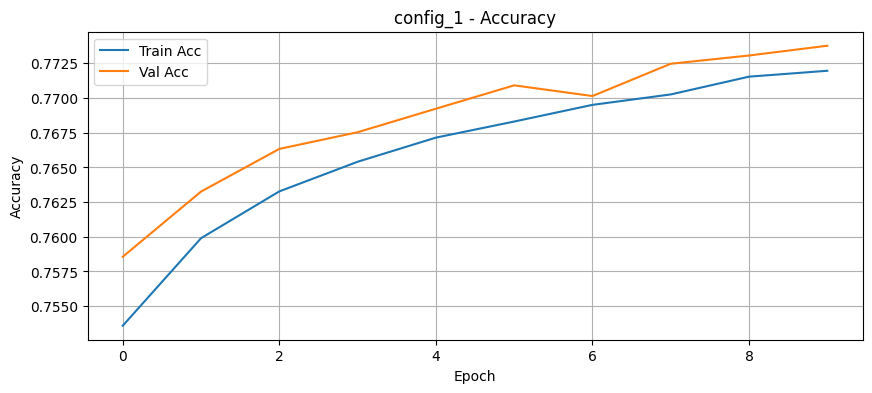

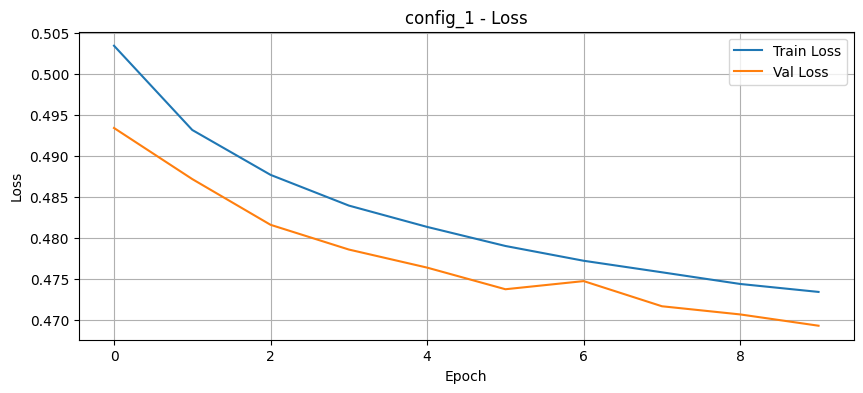


📉 Courbes d'entraînement pour config_2 | Params: {'lstm_units': 128, 'dropout_rate': 0.3, 'batch_size': 256, 'epochs': 15}


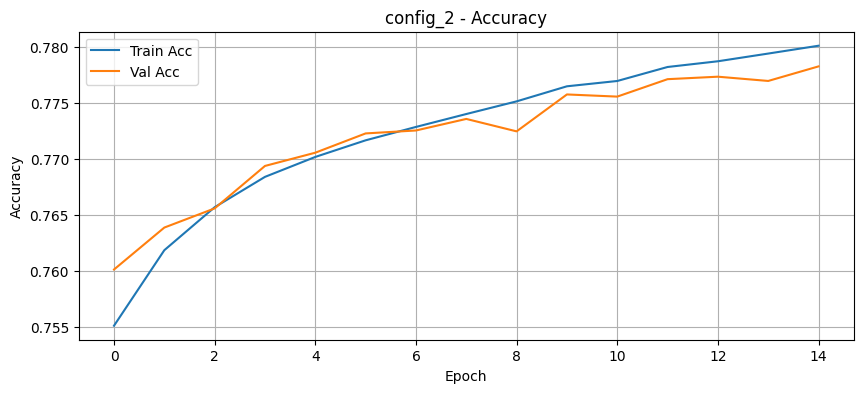

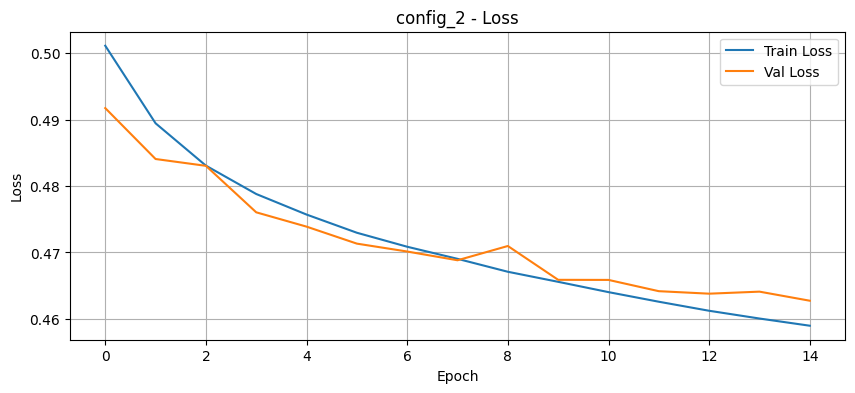


📉 Courbes d'entraînement pour config_3 | Params: {'lstm_units': 256, 'dropout_rate': 0.4, 'batch_size': 64, 'epochs': 8}


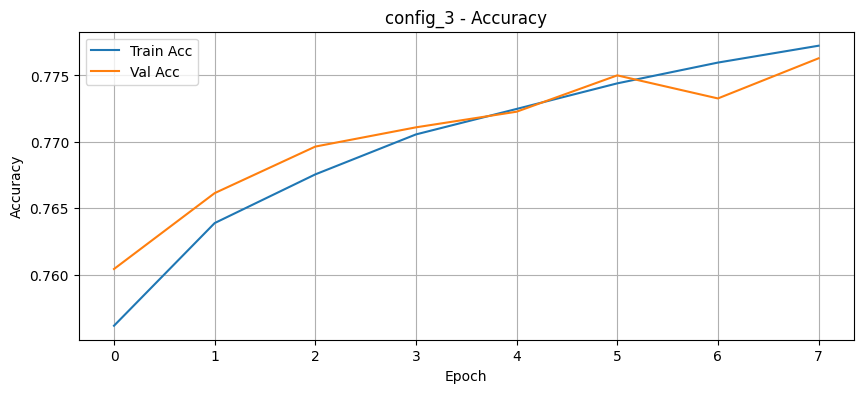

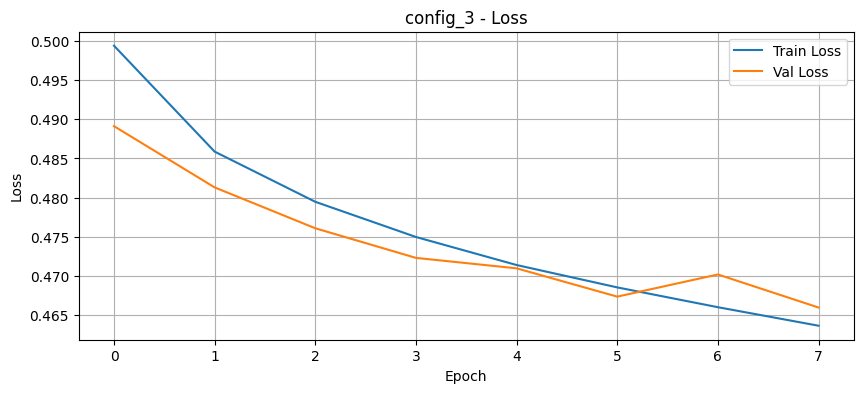


📉 Courbes d'entraînement pour config_4 | Params: {'lstm_units': 16, 'dropout_rate': 0.2, 'batch_size': 512, 'epochs': 3}


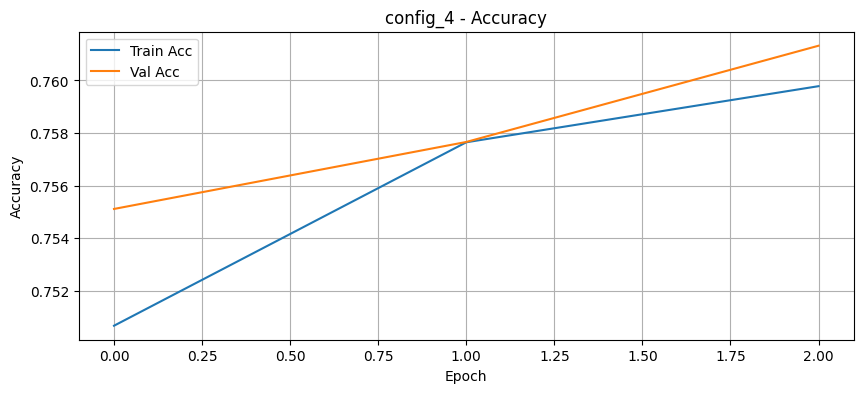

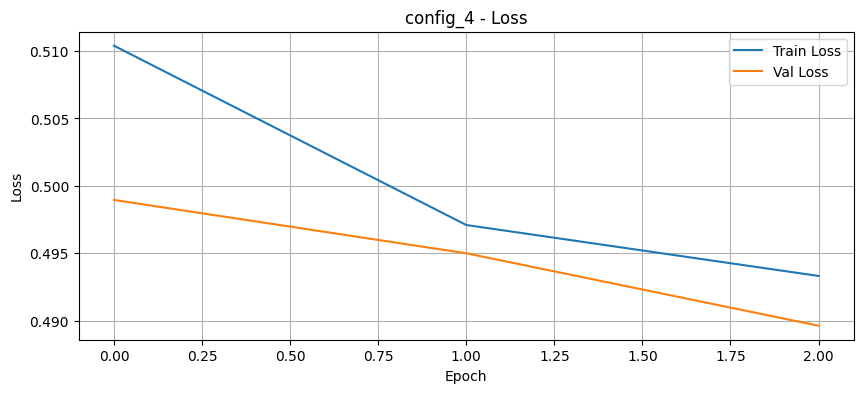

In [24]:
for i, result in enumerate(results_lstm):
    config_id = result["config_id"]
    params = {k: result[k] for k in ["lstm_units", "dropout_rate", "batch_size", "epochs"]}

    # Recharge le modèle pour récupérer l'historique associé
    print(f"\n📉 Courbes d'entraînement pour {config_id} | Params: {params}")

    # Si tu veux sauvegarder les historiques dans results_lstm, tu dois d'abord stocker `history.history` dans la boucle plus haut :
    # result["history"] = history.history

    hist = result.get("history")

    if hist is not None:
        # Accuracy
        plt.figure(figsize=(10, 4))
        plt.plot(hist['accuracy'], label='Train Acc')
        plt.plot(hist['val_accuracy'], label='Val Acc')
        plt.title(f"{config_id} - Accuracy")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.grid(True)
        plt.show()

        # Loss
        plt.figure(figsize=(10, 4))
        plt.plot(hist['loss'], label='Train Loss')
        plt.plot(hist['val_loss'], label='Val Loss')
        plt.title(f"{config_id} - Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("⚠️ Aucun historique enregistré pour cette configuration.")

## 6.3 - USE + LightGBM

In [25]:
X_use_train, X_use_test, y_use_train, y_use_test = train_test_split(
    X_use, y_use, test_size = 0.2, random_state = 70, stratify = y_use
)
lgbm_model = mt.train_lightgbm(X_use_train, y_use_train, X_use_test, y_use_test)
# lgbm_model = mt.train_lightgbm(X_use_train, y_use_train, X_use_test, y_use_test, force_retrain = True)

🚀 Nouveau run démarré : 7968d558bce7461aabce81ed2b2d6bf9
✅ Modèle LightGBM existant. Chargement...
🏃 View run learned-ray-663 at: http://127.0.0.1:5000/#/experiments/2/runs/7968d558bce7461aabce81ed2b2d6bf9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/2
✅ Run terminé.


## 6.4 - DistilBERT
### 6.4.1 - Préparation

In [26]:
df_sample = dp.prepare_distilbert_dataset(tweets_cleaned)
tokenized = dp.tokenize_distilbert_dataset(df_sample)

🚀 Nouveau run démarré : f1a2a180ba22434ebe6c53c66f16fbd3
✅ Dataset DistilBERT existant. Chargement...
🏃 View run fearless-stoat-770 at: http://127.0.0.1:5000/#/experiments/2/runs/f1a2a180ba22434ebe6c53c66f16fbd3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/2
✅ Run terminé.
🚀 Nouveau run démarré : 5bd1051ee82f49de9bd6eec0e08c283a
✅ Tokenized dataset déjà existant. Chargement depuis ../models_saved/tokenized_distilbert_dataset...
🏃 View run gaudy-steed-26 at: http://127.0.0.1:5000/#/experiments/2/runs/5bd1051ee82f49de9bd6eec0e08c283a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/2
✅ Run terminé.


### 6.2.2 - Fine-tuning 

In [27]:
model, trainer, _ = mt.train_distilbert_model(tokenized)
# model, trainer, _ = mt.train_distilbert_model(tokenized, force_retrain = True)

🚀 Nouveau run démarré : 34d9ef59cb714634b32620ab99b3b870
✅ Modèle DistilBERT déjà fine-tuné. Chargement depuis ../models_saved/distilbert_model...
🏃 View run casual-sponge-74 at: http://127.0.0.1:5000/#/experiments/2/runs/34d9ef59cb714634b32620ab99b3b870
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/2
✅ Run terminé.


# 7 - Evaluation

In [28]:
distilbert_acc, distilbert_f1 = ev.evaluate_distilbert_model(model, tokenized)

🚀 Nouveau run démarré : f3a1674a29204e13b97d5c017097c5e3
✅ Résultats d'évaluation déjà disponibles. Chargement...

📊 Rapport DistilBERT :
              precision    recall  f1-score   support

           0       0.85      0.84      0.84     10038
           1       0.84      0.85      0.84      9962

    accuracy                           0.84     20000
   macro avg       0.84      0.84      0.84     20000
weighted avg       0.84      0.84      0.84     20000

🏃 View run bittersweet-crow-521 at: http://127.0.0.1:5000/#/experiments/2/runs/f3a1674a29204e13b97d5c017097c5e3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/2
✅ Run terminé.


# 8 - Comparaison finale des modèles

In [29]:
models_dict = {
    'logreg': log_reg_model,
    'rf': rf_model,
    'lgbm': lgbm_model,
    'distilbert_metrics': {
        'accuracy': distilbert_acc,
        'f1': distilbert_f1
    },
    'lstm_metrics': {
        'accuracy': 0.7780,
        'f1': 0.7801
    }
}

datasets_dict = {
    'tfidf': {'X_test': X_tfidf_test, 'y_test': y_test},
    'fasttext': {'X_test': X_ft_test, 'y_test': y_test},
    'lstm': (X_ft_test_reshaped, y_ft_test),
    'use': {'X_test': X_use_test, 'y_test': y_use_test}
}

training_stats = {
    'logreg': {'time': 22.3, 'cpu': 87, 'ram': 65},
    'rf': {'time': 31.8, 'cpu': 92, 'ram': 68},
    'lgbm': {'time': 45.5, 'cpu': 80, 'ram': 60},
    'lstm_metrics': {'time': 123.0, 'cpu': 97, 'ram': 85},
    'distilbert_metrics': {'time': 650.3, 'cpu': 99, 'ram': 90}
}

🚀 Nouveau run démarré : 8e31763bd70a48b5a86a67859be4390d

📊 Résultats pour : logreg
              precision    recall  f1-score   support

           0       0.77      0.72      0.75    158037
           1       0.74      0.79      0.76    158256

    accuracy                           0.76    316293
   macro avg       0.76      0.76      0.76    316293
weighted avg       0.76      0.76      0.76    316293



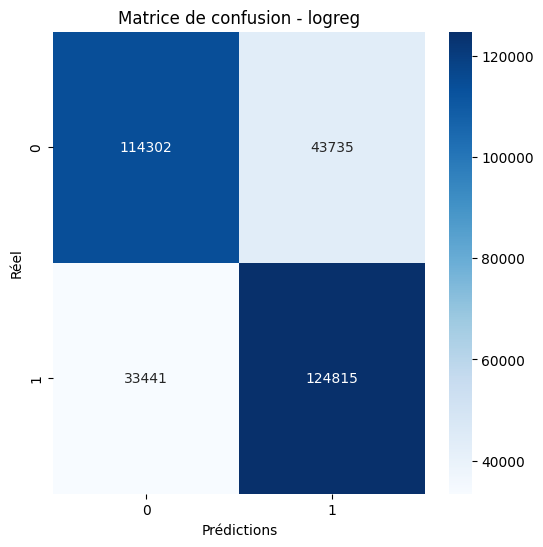


📊 Résultats pour : rf
              precision    recall  f1-score   support

           0       0.73      0.74      0.73    158037
           1       0.74      0.72      0.73    158256

    accuracy                           0.73    316293
   macro avg       0.73      0.73      0.73    316293
weighted avg       0.73      0.73      0.73    316293



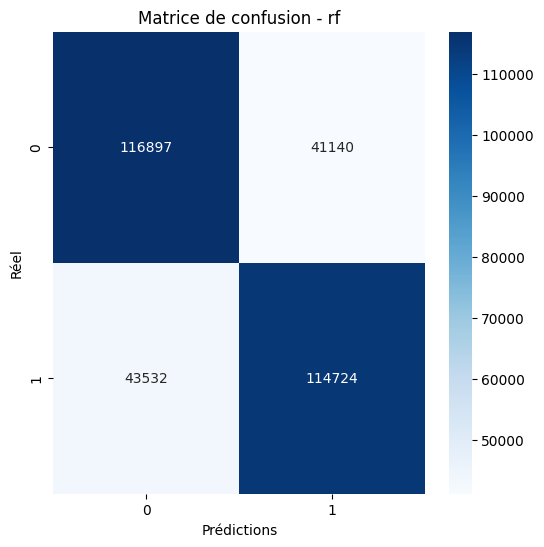


📊 Résultats pour : lgbm
              precision    recall  f1-score   support

           0       0.72      0.71      0.71      1505
           1       0.71      0.72      0.72      1495

    accuracy                           0.72      3000
   macro avg       0.72      0.72      0.72      3000
weighted avg       0.72      0.72      0.72      3000



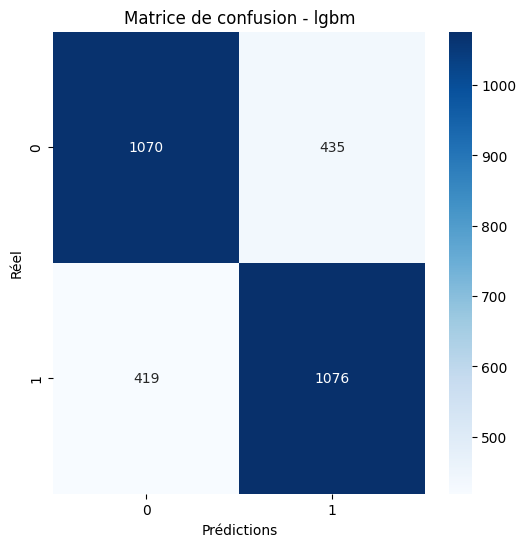


📊 Comparaison finale des modèles :


,Modèle,Accuracy,F1-score,Temps d'entraînement (s),CPU (%),RAM (%)
0,logreg,0.7560,0.7638,22.3,87,65
1,rf,0.7323,0.7304,31.8,92,68
2,lgbm,0.7153,0.7159,45.5,80,60
3,DistilBERT fine-tuné,0.8423,0.8427,650.3,99,90
4,LSTM (config_2),0.7780,0.7801,123.0,97,85


🏃 View run valuable-chimp-980 at: http://127.0.0.1:5000/#/experiments/2/runs/8e31763bd70a48b5a86a67859be4390d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/2
✅ Run terminé.


In [31]:
df_results = ev.get_all_model_scores(models_dict, datasets_dict, training_stats)

# 9 - Tracking MLFlow

In [32]:
y_pred = log_reg_model.predict(X_tfidf_test)
with mlflow.start_run(run_name="Logistic Regression final metrics"):
    mlflow.log_param("model", "Logistic Regression")
    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))
    mlflow.log_metric("f1_score", f1_score(y_test, y_pred))

🏃 View run Logistic Regression final metrics at: http://127.0.0.1:5000/#/experiments/2/runs/4ab968d789fb4e0c81853ac7f6a7c176
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/2


In [33]:
if mlflow.active_run() is not None:
    mlflow.end_run()

In [34]:
with mlflow.start_run():
    # entraînement modèle, log params & metrics
    mlflow.log_param("model", "Logistic Regression")
    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))

🏃 View run gregarious-moth-766 at: http://127.0.0.1:5000/#/experiments/2/runs/9213f835f98747e6861efb3033903f59
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/2


# A désactiver en production

In [35]:
utils.launch_mlflow_ui()

🚀 MLFlow UI lancé sur http://127.0.0.1:5000


In [36]:
# mlflow.end_run()  # Pour stopper tout run en cours
